In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas # For CSV parsing
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [24]:
%run closuresim.py

# Import our GLEAM Sources


In [3]:
LST_HOUR = 3.5
LST_RADIANS = (LST_HOUR/24)*(2*numpy.pi)

GLEAM_CSV_DIR="/Users/jameskent/Library/Mobile Documents/com~apple~CloudDocs/PhD/Academic/Closures/"

In [4]:
gleam_sources = pandas.read_csv(GLEAM_CSV_DIR+"gleam_catalogue_full_freqs.csv",header=0,sep=',')

## We need to shoehorn in a few strong sources that are not in the GLEAM catalogue by default, but are almost point sources with HERA's dirty beam
# These sources are:
# Reference is for the flux values 
# - Fornax A - McKinley et al 2015
# - Cassiopeia A - Baars et al 1977
# - Cygnus A - Baars et al 1977
# - Centaurus A - Slee Sheridan 1975
# - Messier 87 - 
# - Taurus A - Baars et al 1977

strong_sources = []
strong_sources.insert(0, {'Record #': -1,'GLEAM': "Fornax A", "RAJ2000": 50.675, "e_RAJ2000": 0.0, "DEJ2000": -37.083, "Fpwide":0.0, "Fintwide":750.0, "Fint143":750.0})
strong_sources.insert(0, {'Record #': -2,'GLEAM': "Cassiopeai A", "RAJ2000": 350.85, "e_RAJ2000": 0.0, "DEJ2000": 58.8167, "Fpwide":0.0, "Fintwide":12800.0, "Fint143":12800.0})
strong_sources.insert(0, {'Record #': -3,'GLEAM': "Cygnus A", "RAJ2000": 299.8667, "e_RAJ2000": 0.0, "DEJ2000": 40.7339, "Fpwide":0.0, "Fintwide":10500.0,"Fint143":10500.0})
strong_sources.insert(0, {'Record #': -4,'GLEAM': "Centaurus A", "RAJ2000": 201.37, "e_RAJ2000": 0.0, "DEJ2000": -43.0192, "Fpwide":0.0, "Fintwide":894.0,"Fint143":894.0}) # Slee Sheridan 1975 Flux Values
strong_sources.insert(0, {'Record #': -5,'GLEAM': "Messier 87", "RAJ2000": 187.7042, "e_RAJ2000": 0.0, "DEJ2000": 12.3911, "Fpwide":0.0, "Fintwide":1000.0,"Fint143":1000.0})
strong_sources.insert(0, {'Record #': -6,'GLEAM': "Taurus A", "RAJ2000": 83.633, "e_RAJ2000": 0.0, "DEJ2000": 22.0144, "Fpwide":0.0, "Fintwide":1430.0,"Fint143":1430.0})



gleam_sources = pandas.concat([pandas.DataFrame(strong_sources),gleam_sources],ignore_index=True,sort=False)


In [5]:
gleam_sources

,DEJ2000,Fint143,Fintwide,Fpwide,GLEAM,RAJ2000,Record #,e_RAJ2000,e_DEJ2000,Fint130,Fint151
0,22.014400,1430.000000,1430.000000,0.0,Taurus A,83.633000,-6,0.000000,NaN,NaN,NaN
1,12.391100,1000.000000,1000.000000,0.0,Messier 87,187.704200,-5,0.000000,NaN,NaN,NaN
2,-43.019200,894.000000,894.000000,0.0,Centaurus A,201.370000,-4,0.000000,NaN,NaN,NaN
3,40.733900,10500.000000,10500.000000,0.0,Cygnus A,299.866700,-3,0.000000,NaN,NaN,NaN
4,58.816700,12800.000000,12800.000000,0.0,Cassiopeai A,350.850000,-2,0.000000,NaN,NaN,NaN
5,-37.083000,750.000000,750.000000,0.0,Fornax A,50.675000,-1,0.000000,NaN,NaN,NaN
6,0.209235,0.114244,0.063104,63570.0,J025910+001233,44.792698,144660,0.002064,0.002354,0.077071,0.028893
7,0.393856,0.023996,0.045490,41566.0,J030103+002337,45.263855,144930,0.004849,0.004024,0.027813,0.016631
8,0.484087,0.061510,0.072438,69267.0,J030109+002902,45.289993,145020,0.002513,0.002008,0.106075,0.077387
9,0.564460,0.138590,0.071416,69236.0,J030222+003352,45.593147,145200,0.001901,0.002756,0.066657,0.102060


In [6]:
ra = numpy.radians(gleam_sources['RAJ2000'])
dec = numpy.radians(gleam_sources['DEJ2000'])

In [7]:
ha,dec = radec_to_hadec(ra,dec,LST_RADIANS)

In [8]:
ha

0        -0.543373
1        -2.359758
2        -2.598272
3        -4.317363
4        -5.207190
5         0.031852
6         0.134518
7         0.126295
8         0.125838
9         0.120547
10        0.123971
11        0.124667
12        0.139596
13        0.138587
14        0.129397
15        0.132681
16        0.129588
17        0.127284
18        0.135251
19        0.135265
20        0.135785
21        0.128904
22        0.116244
23        0.121858
24        0.113606
25        0.112483
26        0.122560
27        0.124858
28        0.123919
29        0.124373
            ...   
307431   -4.542017
307432   -4.555700
307433   -4.554767
307434   -4.562993
307435   -4.565171
307436   -4.549478
307437   -4.555694
307438   -4.560803
307439   -4.559132
307440   -4.556038
307441   -4.588534
307442   -4.592032
307443   -4.591216
307444   -4.585226
307445   -4.575791
307446   -4.580707
307447   -4.578219
307448   -4.596442
307449   -4.597726
307450   -4.585799
307451   -4.573163
307452   -4.

In [9]:
HERA_LAT= numpy.radians(-30.43)
print(HERA_LAT)
alt,az = hadec_to_altaz(ha,dec,HERA_LAT)

-0.5311036913818745


In [10]:
print(min(az))
print(max(az))
print(min(alt))
print(max(alt))

7.756294020618834e-05
6.2831549481892
-1.559266897044437
1.5702081643132941


In [11]:
l,m,n = altaz_to_dircos(alt,az)

In [12]:
print(min(l),max(l))
print(min(m),max(m))
print(min(n),max(n))


-0.9999966577213376 0.9999874652830416
-0.9916529530663158 0.8689833407000173
-0.999999987366926 -1.7296754739604125e-07


# Now generate a HERA Layout as in the simpler example.

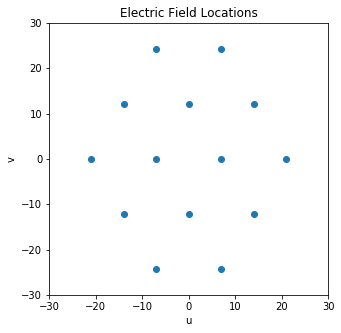

In [13]:
locs = generate_hera_layout_simple()
us = locs[:,0]
vs = locs[:,1]
ws = locs[:,2]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us,vs)
ax.set_title('Electric Field Locations')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_xlabel('u'); ax.set_ylabel('v');# ax.set_zlabel('v'); 

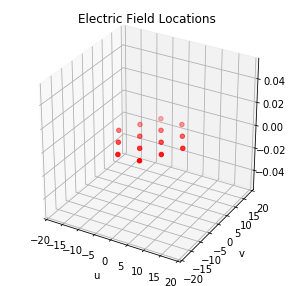

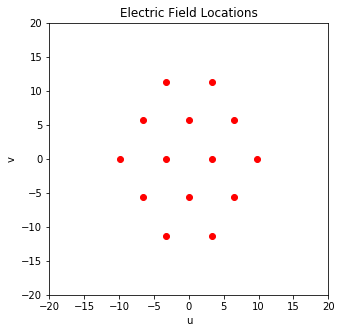

In [14]:
frequency = 140e6 # Let's just do this in a single channel for now.
chan_bw = 25e3

wavelength = 3e8 / frequency

locs_uvw = locs/wavelength

us_uvw = locs_uvw[:,0]
vs_uvw = locs_uvw[:,1]
ws_uvw = locs_uvw[:,2]

fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': '3d'})
ax.scatter(us_uvw,vs_uvw,ws_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us_uvw,vs_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

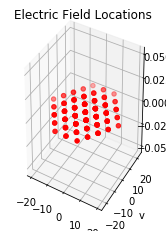

In [15]:
baselines = generate_baseline_vectors(locs_uvw)
plot_baselines(baselines)

In [16]:
baselines = baselines.reshape(baselines.shape[0]**2,baselines.shape[2])

In [17]:
# Including zero spacings, possible error term here?
def generate_dirty_beam(baselines,grid_size):
    
    grid = numpy.zeros(shape=(grid_size,grid_size),dtype=numpy.complex128)
    
    for baseline in baselines:
        
        u = baseline[0]
        v = baseline[1]
        w = baseline[2]
        
        uc = int(numpy.floor(u + grid_size/2))
        vc = int(numpy.floor(v + grid_size/2))
        #print(uc,vc)
        grid[vc,uc] += 1.0 + 0j
        
    grid = numpy.fft.fftshift(grid)
    grid = numpy.fft.fft2(grid)
    grid = numpy.fft.fftshift(grid)
    return grid    

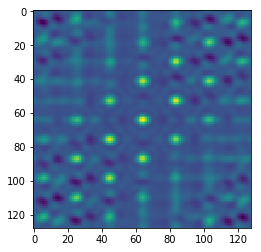

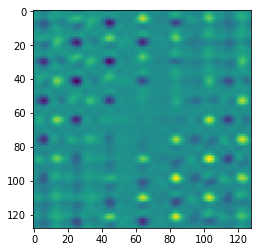

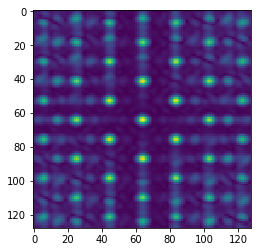

In [18]:
db = generate_dirty_beam(baselines,128)
plt.imshow(numpy.real(db))
plt.show()
plt.imshow(numpy.imag(db))
plt.show()
plt.imshow(numpy.abs(db))
plt.show()

What a horrible dirty beam, but I guess that's what regular arrays will get you...

Now generate a sky and convolve it with the dirty beam. 

First we need to find all the gleam sources above the horizon during the time of observation. Get rid of any below a certain Jansky value or the simulation will be excruciatingly slow.

In [19]:
def find_gleam_sources(source_dataframe,lst,latitude,jy_threshold):
    ra = numpy.radians(source_dataframe['RAJ2000'])
    dec = numpy.radians(source_dataframe['DEJ2000'])
    ha,dec = radec_to_hadec(ra,dec,lst)
    alt,az = hadec_to_altaz(ha,dec,latitude)
    
    #First threshold by finding everything above the horizon.
    
    above_horizon = alt > 0
    #print(above_horizon.shape)
    #alts = alt[above_horizon]
    #azs = az[above_horizon]
    
    # Now threshold by the jansky's
    jy = source_dataframe['Fint143']
    jy_above_threshold = jy > jy_threshold
    
    sky_sources = numpy.logical_and(above_horizon,jy_above_threshold)
    
    # Now extract from pandas into normal numpy arrays
    alts = alt[sky_sources].values
    azs = az[sky_sources].values
    jys = jy[sky_sources].values
    
    print("Number of Sources: ",alts.shape)
    gleam_sources = {'alt':alts,
                    'az': azs,
                    'jy': jys}
    
    return gleam_sources
    
    
    
    
    

In [20]:
sources = find_gleam_sources(gleam_sources,LST_RADIANS,HERA_LAT,8.0)

Number of Sources:  (365,)


In [21]:
from scipy.signal import convolve2d
def generate_sky_from_sources(sources,grid_size):
    
    az=sources['az']
    alt=sources['alt']
    jy=sources['jy']
    
    l,m,n=altaz_to_dircos(alt,az)
    
    
    no_points = az.shape[0]
    lm_step = 2/grid_size
    sky = numpy.zeros(shape=(grid_size,grid_size),dtype=numpy.complex128)
    
    
    # Put sources onto sky grid
    for i in numpy.arange(no_points):
    
        lc = int(numpy.floor(l[i]/lm_step) - grid_size/2)
        mc = int(numpy.floor(m[i]/lm_step) - grid_size/2)
        
        sky[mc,lc] += jy[i]
    
    
    
    return sky

In [22]:
sky = generate_sky_from_sources(sources,128)
dba = numpy.abs(db)


# Let's move onto closure simulations. 

First lets generate some non-chromatic beams for each antenna. Then simulate visibilities and see how things change for closures.



In [33]:
means = numpy.asarray([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
ls,ms,beams_matrix_vis_ad,be = generate_airy_power_beams_pointing_errors(locs_uvw, 10.0,bw_error=0.01)

print("Beam Error: ",be*100,"%")

(14, 2000, 2000)
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
[ 574 1052 1526 1998 2470]
0.161565678510252
Beam Error:  16.1565678510252 %


In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
def print_beams_matrix(beams_matrix):
    
    no_of_beams = beams_matrix.shape[0]
    
    fig = plt.figure(figsize=(10,40))
    for i in numpy.arange(0,no_of_beams):
        ax1 = fig.add_subplot(no_of_beams,1,i+1)

        im1 = ax1.imshow(beams_matrix[i,:],norm=LogNorm(vmin=0.000001, vmax=1),cmap=plt.get_cmap('jet'))
        divider = make_axes_locatable(ax1)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im1, cax=cax, orientation='vertical')
        
    plt.tight_layout()
    plt.show()

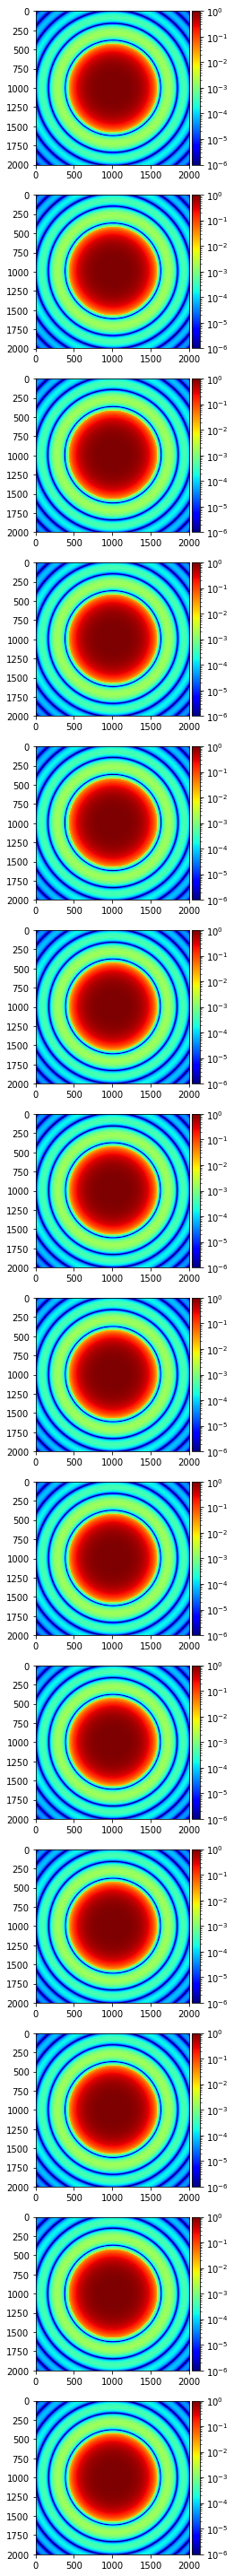

In [35]:
print_beams_matrix(beams_matrix_vis_ad)

In [36]:
def find_airy_beam_at_point(beam,point):
    beam_shape = beam.shape[0]
    
    pl = point[0]
    pm = point[1]
    
    step = 2/beam_shape
    
    bl_ind = int((pl + 1)/step)
    bm_ind = int((pm + 1)/step)
    
    # Multiple real/imaginary seperately.
    
    return beam[bl_ind,bm_ind]

def simulate_visibilities_airy_sky(layout,sky,beams):
    
    vis_matrix = numpy.zeros(shape=(layout.shape[0],layout.shape[0]),dtype=numpy.complex128)
    grid_size = sky.shape[0]
    lm_step = 2/grid_size
    
    for i in numpy.arange(layout.shape[0]):
        for j in numpy.arange(layout.shape[0]):        
            
            ud = layout[i,0] - layout[j,0]
            vd = layout[i,1] - layout[j,1]
            wd = layout[i,2] - layout[j,2]
            lm_step = 2/grid_size       
            
            for lc in numpy.arange(grid_size):
                lp = (lc-grid_size//2) * lm_step
                for mc in numpy.arange(grid_size):
                    mp = (mc-grid_size//2) * lm_step
                    if(lp**2 + mp**2 > 1):
                        continue
                    np = numpy.sqrt(1.0-lp**2-mp**2) - 1.0
                    b1 = find_airy_beam_at_point(beams[i,:],[lp,mp,0])
                    b2 = find_airy_beam_at_point(beams[j,:],[lp,mp,0])
                    bap = b1 * b2 # Each antenna has same beam so square
                
                    phase_factor = numpy.exp(-2j * numpy.pi * (ud*lp + vd*mp + wd*np))
                    point_amp = sky[mc,lc]
                    vis_matrix[i,j] += point_amp * bap * phase_factor
                
    return vis_matrix/(grid_size**2)

In [37]:
%%time
vis = simulate_visibilities_airy_sky(locs_uvw,sky,beams_matrix_vis_ad)

CPU times: user 50.8 s, sys: 165 ms, total: 50.9 s
Wall time: 51.2 s


Make our list of closure triads

In [38]:
List_of_antennas = [[[0,2],[2,3],[3,0]],
                    [[1,3],[3,4],[4,1]],
                    [[2,5],[5,6],[6,2]],
                    [[3,6],[6,7],[7,3]],
                    [[4,7],[7,8],[8,4]],
                    [[6,9],[9,10],[10,6]],
                    [[7,10],[10,11],[11,7]],
                    [[10,12],[12,13],[13,10]]]

In [39]:
closures = generate_closure_triads_tp(vis,List_of_antennas)
print(closures)
print(calculate_closure_standard_deviation(closures))

[-0.89997849 -0.9021088  -0.92788003 -0.92809446 -0.9148047  -0.95017517
 -0.92935741 -0.91609262]
0.015329467106582643


So if you twiddle around with the LST paramter we definitely see low divergence when FornaxA is close to zenith, and poorer redundancy outside of this. 

Clearly the smoking gun is infront of us here. 

In [40]:
%%time
stddevs = []
for i in numpy.arange(0,2*numpy.pi,0.025):
    sources = find_gleam_sources(gleam_sources,i,HERA_LAT,8.0)
    sky = generate_sky_from_sources(sources,128)
    vis = simulate_visibilities_airy_sky(locs_uvw,sky,beams_matrix_vis_ad)
    closures = generate_closure_triads_tp(vis,List_of_antennas)
    print("LST: ",i)
    print(closures)
    stdev = calculate_closure_standard_deviation(closures)
    stddevs.append(stdev)
    print("Circular Standard Deviation: ",stdev)
    print("--------------")

Number of Sources:  (360,)
LST:  0.0
[-0.8021086  -0.80977485 -0.83539668 -0.83560225 -0.82135529 -0.8556896
 -0.83982528 -0.81255012]
Circular Standard Deviation:  0.016909259778684613
--------------
Number of Sources:  (359,)
LST:  0.025
[-0.89997849 -0.9021088  -0.92788003 -0.92809446 -0.9148047  -0.95017517
 -0.92935741 -0.91609262]
Circular Standard Deviation:  0.015329467106582643
--------------
Number of Sources:  (359,)
LST:  0.05
[-1.58842686 -1.59018123 -1.62476525 -1.62203683 -1.60865245 -1.64321707
 -1.61981239 -1.60609536]
Circular Standard Deviation:  0.01721425248319042
--------------
Number of Sources:  (359,)
LST:  0.07500000000000001
[-1.36483349 -1.364773   -1.38057852 -1.38165971 -1.37253562 -1.39765664
 -1.38266912 -1.37736426]
Circular Standard Deviation:  0.010039531685549321
--------------
Number of Sources:  (358,)
LST:  0.1
[-0.83713197 -0.84132798 -0.85195877 -0.85017574 -0.84693266 -0.85324865
 -0.85012286 -0.83838986]
Circular Standard Deviation:  0.0059322

In [41]:
stddevsnpy = numpy.asarray(stddevs)
numpy.savez("stddevs_airy_bw_normal_dw.npz",stddevs=stddevsnpy)

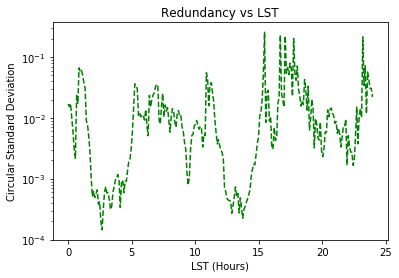

In [42]:
time = numpy.arange(0,2*numpy.pi,0.025)
time = (time/(2*numpy.pi))*24


plt.plot(time,stddevsnpy,'g--')
plt.yscale('log')
plt.title("Redundancy vs LST")
plt.xlabel("LST (Hours)")
plt.ylabel("Circular Standard Deviation")
plt.savefig("redundancysim_sidelobes.pdf")
plt.show()